# Machine Learning with apache spark

## Importing libraries

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import seaborn as sns
import matplotlib.pyplot as plt

## Connect to spark

In [2]:
!pip3 show pyspark

Name: pyspark
Version: 3.3.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /usr/local/spark-3.3.1-bin-hadoop3/python
Requires: py4j
Required-by: 


In [3]:
# SparkSession
URL_SPARK = "spark://spark:7077"

# spark.driver.ExtraClassPath
spark = (
    SparkSession.builder
    .appName("spark-app-jupyter")
    
    .master(URL_SPARK)
    .getOrCreate()
)

Testing spark connection

In [4]:
spark.range(2).show()

+---+
| id|
+---+
|  0|
|  1|
+---+



## Importing data

In [5]:
df_avocado = spark.read.csv("/data/avocado.csv", header=True, inferSchema=True)

# cache data
df_avocado.cache()

df_avocado.show(4)

+---+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+----+------+
|_c0|               Date|AveragePrice|Total Volume|   4046|     4225| 4770|Total Bags|Small Bags|Large Bags|XLarge Bags|        type|year|region|
+---+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+----+------+
|  0|2015-12-27 00:00:00|        1.33|    64236.62|1036.74| 54454.85|48.16|   8696.87|   8603.62|     93.25|        0.0|conventional|2015|Albany|
|  1|2015-12-20 00:00:00|        1.35|    54876.98| 674.28| 44638.81|58.33|   9505.56|   9408.07|     97.49|        0.0|conventional|2015|Albany|
|  2|2015-12-13 00:00:00|        0.93|   118220.22|  794.7|109149.67|130.5|   8145.35|   8042.21|    103.14|        0.0|conventional|2015|Albany|
|  3|2015-12-06 00:00:00|        1.08|    78992.15| 1132.0| 71976.41|72.58|   5811.16|    5677.4|    133.76|        0.0|conv

In [6]:
df_avocado.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- AveragePrice: double (nullable = true)
 |-- Total Volume: double (nullable = true)
 |-- 4046: double (nullable = true)
 |-- 4225: double (nullable = true)
 |-- 4770: double (nullable = true)
 |-- Total Bags: double (nullable = true)
 |-- Small Bags: double (nullable = true)
 |-- Large Bags: double (nullable = true)
 |-- XLarge Bags: double (nullable = true)
 |-- type: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: string (nullable = true)



## EDA

In [7]:
df_avocado.show(4)

+---+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+----+------+
|_c0|               Date|AveragePrice|Total Volume|   4046|     4225| 4770|Total Bags|Small Bags|Large Bags|XLarge Bags|        type|year|region|
+---+-------------------+------------+------------+-------+---------+-----+----------+----------+----------+-----------+------------+----+------+
|  0|2015-12-27 00:00:00|        1.33|    64236.62|1036.74| 54454.85|48.16|   8696.87|   8603.62|     93.25|        0.0|conventional|2015|Albany|
|  1|2015-12-20 00:00:00|        1.35|    54876.98| 674.28| 44638.81|58.33|   9505.56|   9408.07|     97.49|        0.0|conventional|2015|Albany|
|  2|2015-12-13 00:00:00|        0.93|   118220.22|  794.7|109149.67|130.5|   8145.35|   8042.21|    103.14|        0.0|conventional|2015|Albany|
|  3|2015-12-06 00:00:00|        1.08|    78992.15| 1132.0| 71976.41|72.58|   5811.16|    5677.4|    133.76|        0.0|conv

### Numerical variables

In [8]:
df_avocado_corr = (
    df_avocado[ 
        [
            'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
            '4046', '4225', '4770',
            'AveragePrice'
        ] 
    ]
    .toPandas()
    .corr()
)

df_avocado_corr.style.background_gradient(cmap='coolwarm_r')

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,4046,4225,4770,AveragePrice
Total Volume,1.000000,0.963047,0.967238,0.880640,0.747157,0.977863,0.974181,0.872202,-0.192752
Total Bags,0.963047,1.000000,0.994335,0.943009,0.804233,0.920057,0.905787,0.792314,-0.177088
Small Bags,0.967238,0.994335,1.000000,0.902589,0.806845,0.925280,0.916031,0.802733,-0.174730
Large Bags,0.880640,0.943009,0.902589,1.000000,0.710858,0.838645,0.810015,0.698471,-0.172940
XLarge Bags,0.747157,0.804233,0.806845,0.710858,1.000000,0.699377,0.688809,0.679861,-0.117592
4046,0.977863,0.920057,0.925280,0.838645,0.699377,1.000000,0.926110,0.833389,-0.208317
4225,0.974181,0.905787,0.916031,0.810015,0.688809,0.926110,1.000000,0.887855,-0.172928
4770,0.872202,0.792314,0.802733,0.698471,0.679861,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.192752,-0.177088,-0.174730,-0.172940,-0.117592,-0.208317,-0.172928,-0.179446,1.000000


Volume and number of bags

In [9]:
(
    df_avocado[ 
        ['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'] 
    ]
    .describe()
    .show()
)

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|      Total Volume|        Total Bags|        Small Bags|        Large Bags|       XLarge Bags|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|             18249|             18249|             18249|             18249|             18249|
|   mean| 850644.0130089332|239639.20205983953|182194.68669571026| 54338.08814455636|3106.4265072058793|
| stddev|3453545.3553994684| 986242.3992164108| 746178.5149617895|243965.96454740898| 17692.89465191642|
|    min|             84.56|               0.0|               0.0|               0.0|               0.0|
|    max|     6.250564652E7|     1.937313437E7|      1.33845868E7|        5719096.61|         551693.65|
+-------+------------------+------------------+------------------+------------------+------------------+



In [10]:
(
    df_avocado[ 
        ['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'] 
    ]
    .toPandas()
    .corr()
)

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
Total Volume,1.000000,0.963047,0.967238,0.880640,0.747157
Total Bags,0.963047,1.000000,0.994335,0.943009,0.804233
Small Bags,0.967238,0.994335,1.000000,0.902589,0.806845
Large Bags,0.880640,0.943009,0.902589,1.000000,0.710858
XLarge Bags,0.747157,0.804233,0.806845,0.710858,1.000000


4046, 4225, 4770

In [11]:
(
    df_avocado[ 
        ['4046', '4225', '4770'] 
    ]
    .describe()
    .show()
)

+-------+------------------+------------------+------------------+
|summary|              4046|              4225|              4770|
+-------+------------------+------------------+------------------+
|  count|             18249|             18249|             18249|
|   mean|293008.42453066056|295154.56835607596|22839.735992657315|
| stddev|1264989.0817627835|1204120.4011350533|107464.06843537069|
|    min|               0.0|               0.0|               0.0|
|    max|     2.274361617E7|     2.047057261E7|        2546439.11|
+-------+------------------+------------------+------------------+



In [12]:
(
    df_avocado[ 
        ['4046', '4225', '4770']
    ]
    .toPandas()
    .corr()
)

,4046,4225,4770
4046,1.000000,0.926110,0.833389
4225,0.926110,1.000000,0.887855
4770,0.833389,0.887855,1.000000


### Categorical variables

Avocado Type

In [13]:
(
    df_avocado[ 
        ['type'] 
    ]
    .groupBy('type')
    .count()
    .toPandas()
)

,type,count
0,organic,9123
1,conventional,9126


In [23]:
(
    df_avocado[ 
        ['region'] 
    ]
    .groupBy('region')
    .count()
    .show(100)
)

+-------------------+-----+
|             region|count|
+-------------------+-----+
|      PhoenixTucson|  338|
|        GrandRapids|  338|
|      SouthCarolina|  338|
|            TotalUS|  338|
|   WestTexNewMexico|  335|
|         Louisville|  338|
|       Philadelphia|  338|
|         Sacramento|  338|
|      DallasFtWorth|  338|
|       Indianapolis|  338|
|           LasVegas|  338|
|          Nashville|  338|
|         GreatLakes|  338|
|            Detroit|  338|
|             Albany|  338|
|           Portland|  338|
|   CincinnatiDayton|  338|
|           SanDiego|  338|
|              Boise|  338|
| HarrisburgScranton|  338|
|            StLouis|  338|
|   NewOrleansMobile|  338|
|           Columbus|  338|
|         Pittsburgh|  338|
|  MiamiFtLauderdale|  338|
|       SouthCentral|  338|
|            Chicago|  338|
|   BuffaloRochester|  338|
|              Tampa|  338|
|          Southeast|  338|
|             Plains|  338|
|            Atlanta|  338|
|BaltimoreWashington

### Price statistics

Average price by year and month

/tmp/ipykernel_4341/1612995206.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


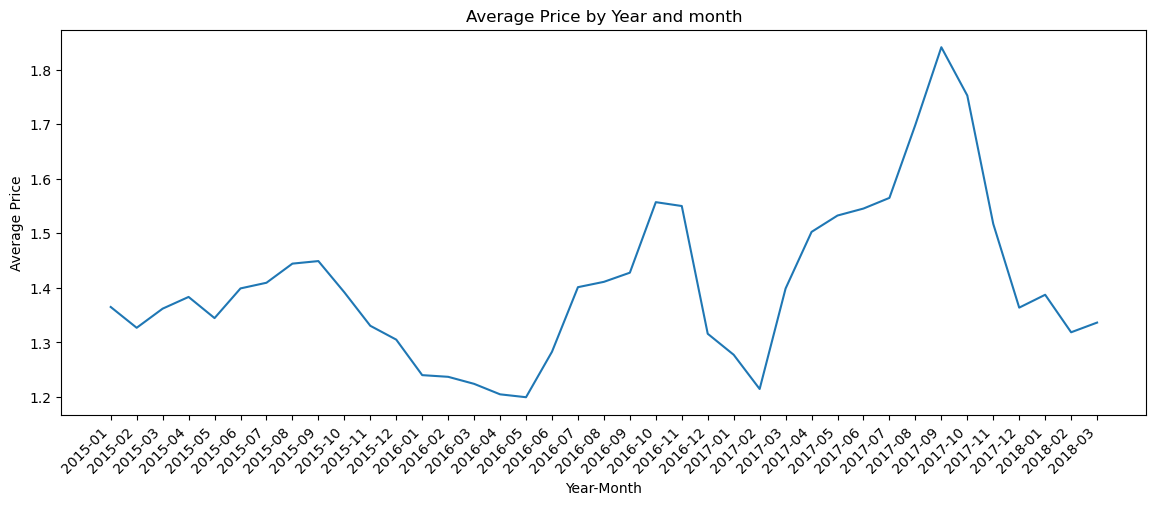

In [14]:
## Monthly Average Price
df_mean_monthly_price = (
    df_avocado
    .withColumn('Date', F.to_date('Date'))
    .withColumn('Date', F.date_format('Date', 'yyyy-MM'))
    .groupBy('Date')
    .agg(F.mean('AveragePrice').alias('AveragePrice'))
    .orderBy('Date')
)

## Plot the result
fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.lineplot(
    x='Date', y='AveragePrice',
    data=df_mean_monthly_price.toPandas(),
    ax=ax,
)

ax.set_title('Average Price by Year and month')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Average Price')

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)
ax=ax

Average price by type

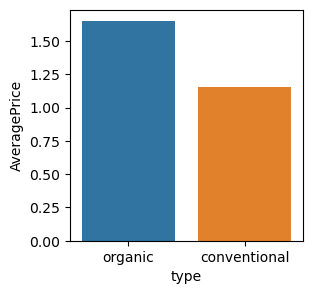

In [15]:
df_mean_price_type = (
    df_avocado
    .groupBy('type')
    .agg(F.mean('AveragePrice').alias('AveragePrice'))
)

## Plot the result
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.barplot(
    x='type', y='AveragePrice',
    data=df_mean_price_type.toPandas(),
    ax=ax,
)

plot price vs number of bags

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


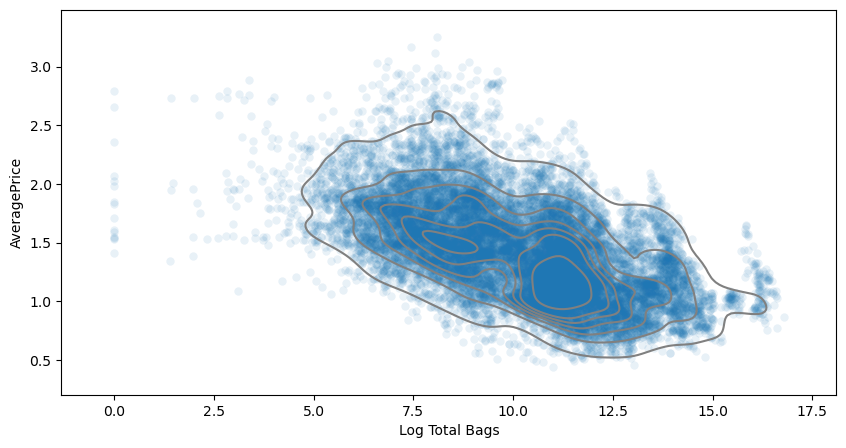

In [16]:
# Scatter plot price vs number of bags

# log Total Bags+1
df_avocado = df_avocado.withColumn('Log Total Bags', F.log(F.col('Total Bags')+1))

fig, ax = plt.subplots(figsize=(10, 5))

# Add a contour plot
ax = sns.scatterplot(
    x='Log Total Bags', y='AveragePrice',
    data=df_avocado.toPandas(),
    alpha=0.1,
    linewidth=0,
    ax=ax,
)

ax = sns.kdeplot(
    x='Log Total Bags', y='AveragePrice',
    data=df_avocado.toPandas(),
    levels=8,
    color='gray',
    ax=ax,
)

Correlation with 4046, 4225, 4770

In [17]:
df_corr_plu = (
    df_avocado
    .select(
        'AveragePrice',
        '4046', '4225', '4770',
    )
    .toPandas()
    .corr()
)

df_corr_plu.style.background_gradient(cmap='coolwarm_r')

,AveragePrice,4046,4225,4770
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446
4046,-0.208317,1.000000,0.926110,0.833389
4225,-0.172928,0.926110,1.000000,0.887855
4770,-0.179446,0.833389,0.887855,1.000000


## Conclusion

Discard columns due to high correlation
- Total Bags (correlated with Small Bags, Large Bags, XLarge Bags)
- Total Volume
- 4046 (correlated with Total Volume)